In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set()

In [2]:
## Specify the dataset
data = r'C:\Users\Student\Downloads\HTL_data.csv'

In [3]:
## Import the data from the excel file
df = pd.read_csv(data)

In [4]:
## read the first five entries of the dataset
df.head()

,Bwr,Temp,Time,Pressure,Yield
0,15.0,300.0,15.0,100,34.97
1,12.0,280.0,10.0,100,24.12
2,18.0,320.0,20.0,100,33.99
3,12.0,320.0,10.0,100,28.85
4,15.0,300.0,15.0,100,34.97


In [5]:
# obtain the statistics about the data
df.describe()

,Bwr,Temp,Time,Pressure,Yield
count,60.000000,60.000000,60.00000,60.000000,60.000000
mean,13.373016,293.413333,25.42500,101.166667,29.151167
std,4.037500,37.725590,16.07947,25.384612,5.979858
min,5.000000,200.000000,5.00000,50.000000,11.300000
25%,10.000000,275.000000,15.00000,100.000000,26.750000
50%,13.000000,300.000000,20.00000,100.000000,29.615000
75%,15.000000,320.000000,35.00000,100.000000,32.985000
max,21.095238,400.000000,60.00000,180.000000,42.120000


In [6]:
# obtain information about the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bwr        60 non-null     float64
 1    Temp      60 non-null     float64
 2   Time       60 non-null     float64
 3   Pressure   60 non-null     int64  
 4   Yield      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [7]:
# define the features
df.columns = df.columns.str.strip().str.lower()
features = ['bwr', 'temp', 'time', 'pressure'] 

In [8]:
# this code ensures that none of the columns should be missed to be read properly
missing = [col for col in features if col not in df.columns]
print("Missing columns:", missing)

Missing columns: []


<Axes: xlabel='temp', ylabel='Count'>

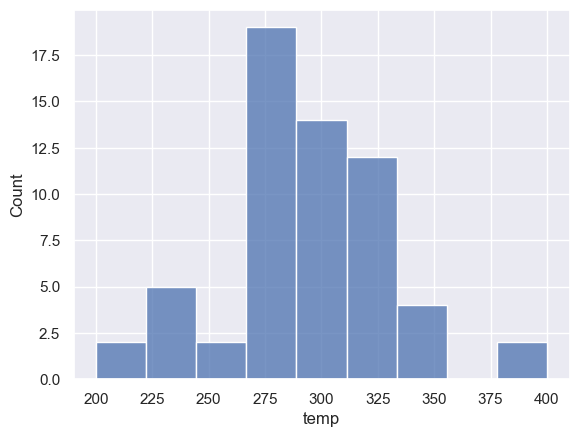

In [9]:
# plotting histograms
sns.histplot(df.temp)


In [10]:
# # # histogram plot along with the pdf
from scipy.stats import norm 

In [11]:
# Obtain the boxplot manually
x = np.linspace(min(df.temp),max(df.temp),1000)

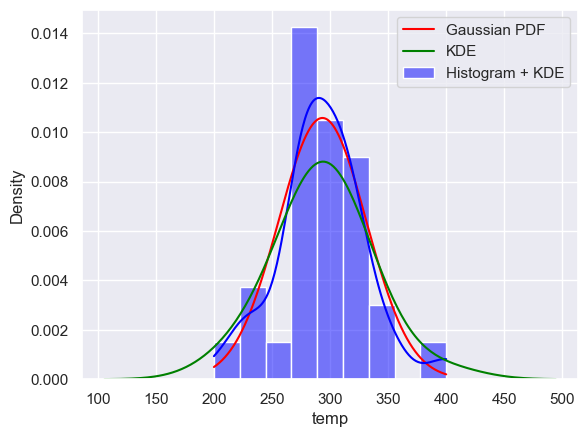

In [20]:
mu = np.mean(df.temp)
sigma = np.std(df.temp, ddof = 1) # for population, ddof=degrees of freedom, bessel's correction factor
y = norm.pdf(x,mu,sigma)

plt.plot(x,y,color="red", label = "Gaussian PDF")

sns.histplot(df.temp, kde= True, stat="density", color = "blue", label = "Histogram + KDE")

# computing bandwidth using Scott's Rule, multiply by adjustment factor

n = len(df.temp) 
h_scott = n**(-1/5)*sigma


sns.kdeplot(df.temp, bw_method = h_scott*0.05, color = 'green', label = "KDE") # bandwidth, adjustment factor 0.05 to make it broader

plt.legend()

<Axes: xlabel='temp', ylabel='Density'>

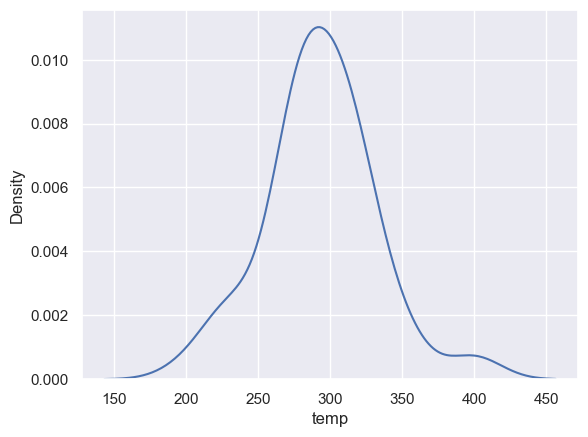

In [13]:
# plotting KDE alone

sns.kdeplot(df.temp, bw_method =0.5) # bandwidth

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

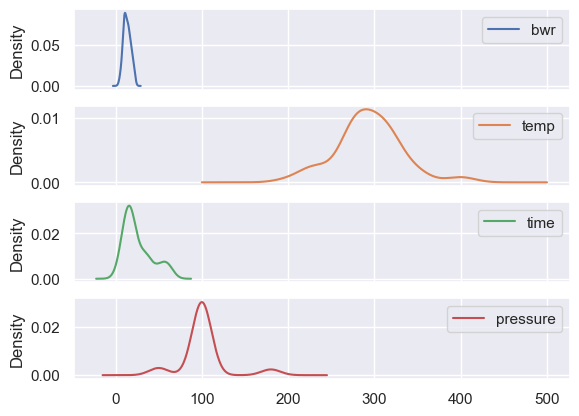

In [55]:
df[features].plot(kind = 'density', subplots=True)

33    400.0
34    400.0
43    200.0
Name: temp, dtype: float64


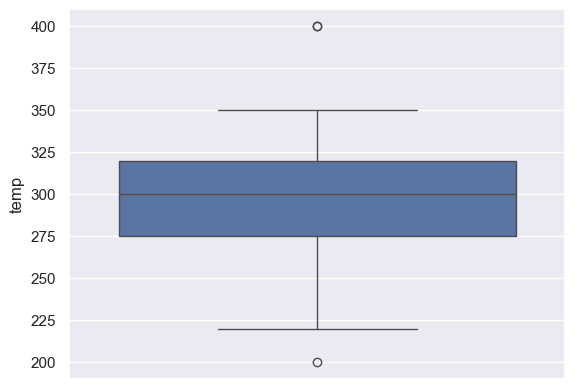

In [28]:
#Univariate outlier detection using box plot
sns.boxplot(df.temp) # 2 outliers, unequal wisker

# manual evaluation of the box plot

Q1 = np.percentile(df.temp,25) # 25th percentile
Q3 = np.percentile(df.temp,75)

IQR = Q3 - Q1

# defining lb and ub

lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

outlier = df.temp [ (df.temp < lb) | (df.temp > ub)]
print(outlier)

<Axes: >

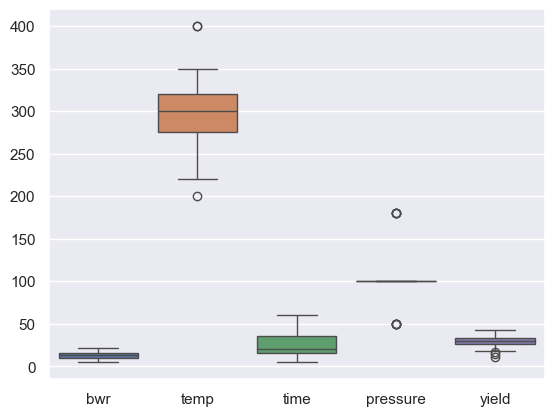

In [29]:
sns.boxplot(df)

,bwr,temp,time,pressure,yield
bwr,1.000000,0.522993,-0.549775,0.548107,0.258170
temp,0.522993,1.000000,-0.415694,0.609916,0.423868
time,-0.549775,-0.415694,1.000000,-0.497455,-0.203718
pressure,0.548107,0.609916,-0.497455,1.000000,-0.180335
yield,0.258170,0.423868,-0.203718,-0.180335,1.000000


<Axes: >

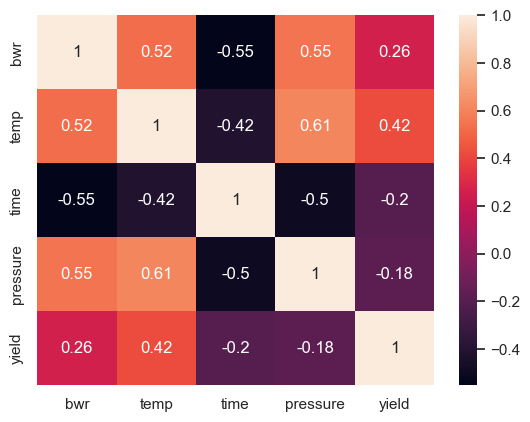

In [36]:
# Multi variate analysis

# correlation matrix

corr_mat = df.corr()
display(corr_mat)
sns.heatmap(corr_mat, annot = True) # how strongly one influences other

In [47]:
# covariance of T and P
cov_TP = np.cov(df.temp, df.pressure)
print(cov_TP) #1423 - variance in T, 644 - var in P, rest are covariances
# correlation of T and P
corr_M = cov_TP / (np.std(df.temp)*np.std(df.pressure))
print(corr_M) # 0.62, which is close to the value in heatmap (0.61)

[[1423.22015819  584.08587571]
 [ 584.08587571  644.37853107]]
[[1.51134896 0.62025371]
 [0.62025371 0.68427981]]


Text(0, 0.5, 'Temperature')

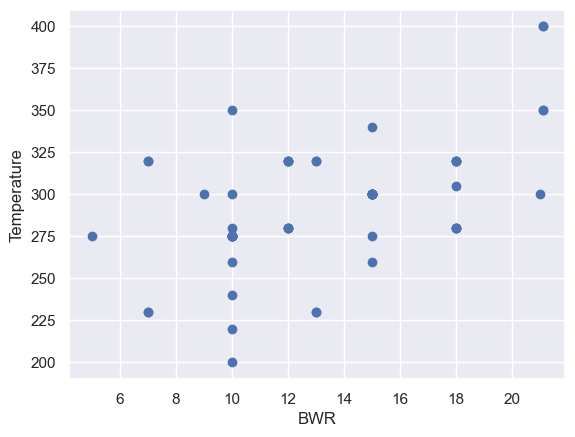

In [49]:
plt.scatter(df.bwr, df.temp)
plt.xlabel('BWR')
plt.ylabel('Temperature')

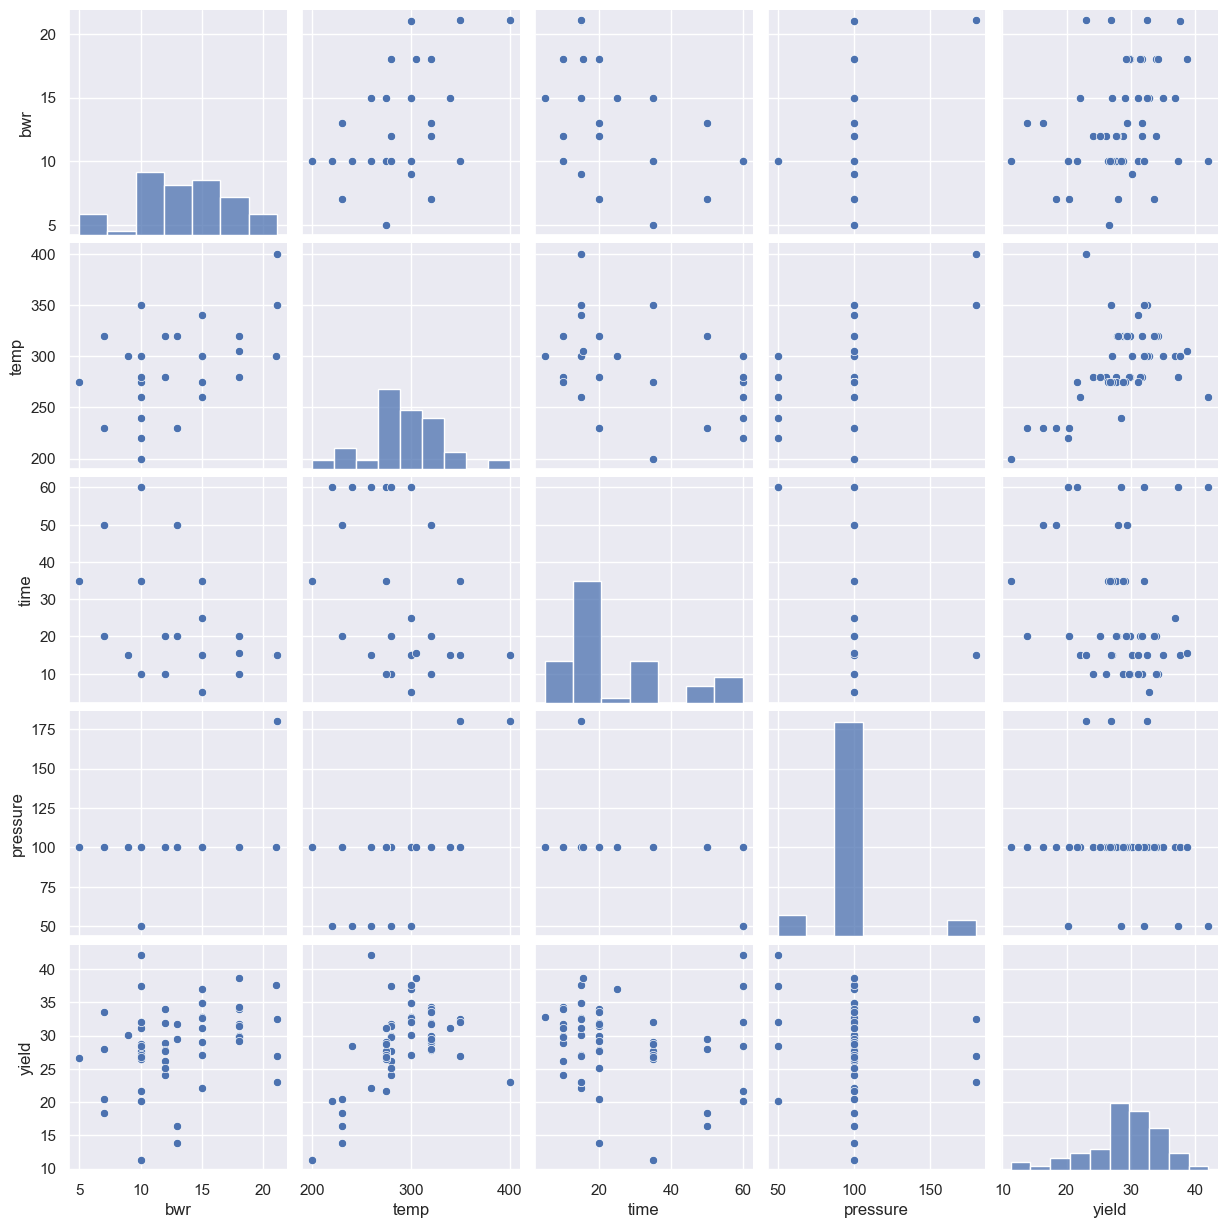

In [51]:
sns.pairplot(df) # like correlation

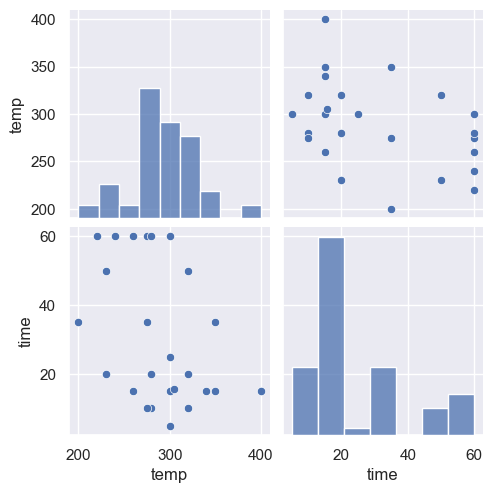

In [53]:
#pairplots
sns.pairplot(df[["temp","time"]])

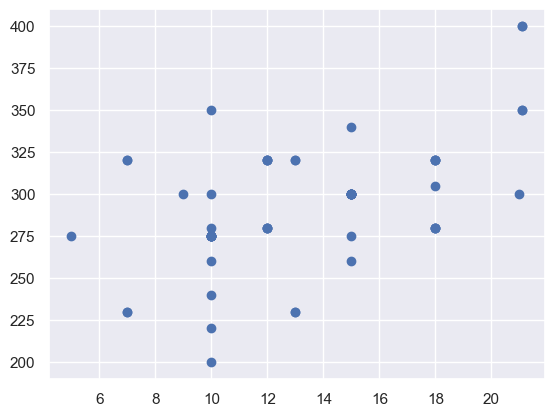

In [15]:
plt.scatter(df.bwr,df.temp)

In [16]:
# pairplots


In [17]:
# correlation matrix to read covariance information among the variables